In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from data_loader import load_data
(x_train_cat, y_train_cat), (x_test_cat, y_test_cat) = load_data('cat')
(x_train_dog, y_train_dog), (x_test_dog, y_test_dog) = load_data('dog')
x_train = np.append(x_train_cat, x_train_dog, axis=0)
y_train = np.append(y_train_cat, y_train_dog, axis=0)
x_test = np.append(x_test_cat, x_test_dog, axis=0)
y_test = np.append(y_test_cat, y_test_dog, axis=0)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6002, 64, 64, 3)
(6002, 1)
(400, 64, 64, 3)
(400, 1)


In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(6002, 12288)

In [5]:
cat_model = Sequential()
cat_model.add(Dense(128, activation='relu', input_shape=(12288,)))
cat_model.add(Dense(64, activation='relu'))
cat_model.add(Dense(32, activation='relu'))
cat_model.add(Dense(16, activation='relu'))
cat_model.add(Dense(1, activation='sigmoid'))

In [6]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,583,873
Trainable params: 1,583,873
Non-trainable params: 0
_________________________________________________________________


In [7]:
cat_model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
cat_model.fit(x_train, y_train,epochs=100 ,validation_data=(x_test, y_test))

Train on 6002 samples, validate on 400 samples
Epoch 1/100
6002/6002 [==============================] - 3s 570us/step - loss: 0.5713 - acc: 0.6971 - val_loss: 0.6596 - val_acc: 0.6250
Epoch 2/100
6002/6002 [==============================] - 3s 510us/step - loss: 0.5648 - acc: 0.7006 - val_loss: 0.6662 - val_acc: 0.6200
Epoch 3/100
6002/6002 [==============================] - 3s 516us/step - loss: 0.5633 - acc: 0.7004 - val_loss: 0.6922 - val_acc: 0.6225
Epoch 4/100
6002/6002 [==============================] - 4s 685us/step - loss: 0.5615 - acc: 0.7096 - val_loss: 0.7110 - val_acc: 0.6125
Epoch 5/100
6002/6002 [==============================] - 3s 528us/step - loss: 0.5589 - acc: 0.7074 - val_loss: 0.6488 - val_acc: 0.6100
Epoch 6/100
6002/6002 [==============================] - 3s 513us/step - loss: 0.5542 - acc: 0.7156 - val_loss: 0.6901 - val_acc: 0.6400
Epoch 7/100
6002/6002 [==============================] - 3s 568us/step - loss: 0.5471 - acc: 0.7234 - val_loss: 0.6734 - val_acc: 0

6002/6002 [==============================] - 3s 514us/step - loss: 0.2658 - acc: 0.8959 - val_loss: 0.9231 - val_acc: 0.5925
Epoch 61/100
6002/6002 [==============================] - 3s 530us/step - loss: 0.2013 - acc: 0.9199 - val_loss: 1.6195 - val_acc: 0.5875
Epoch 62/100
6002/6002 [==============================] - 3s 560us/step - loss: 0.2548 - acc: 0.8995 - val_loss: 1.8075 - val_acc: 0.6025
Epoch 63/100
6002/6002 [==============================] - 3s 534us/step - loss: 0.1666 - acc: 0.9427 - val_loss: 1.2607 - val_acc: 0.5875oss: 0.1676 - a
Epoch 64/100
6002/6002 [==============================] - 3s 526us/step - loss: 0.2019 - acc: 0.9224 - val_loss: 1.2341 - val_acc: 0.6300
Epoch 65/100
6002/6002 [==============================] - 4s 653us/step - loss: 0.1971 - acc: 0.9227 - val_loss: 1.3160 - val_acc: 0.6325
Epoch 66/100
6002/6002 [==============================] - 3s 507us/step - loss: 0.2169 - acc: 0.9235 - val_loss: 1.3203 - val_acc: 0.6200
Epoch 67/100
6002/6002 [========

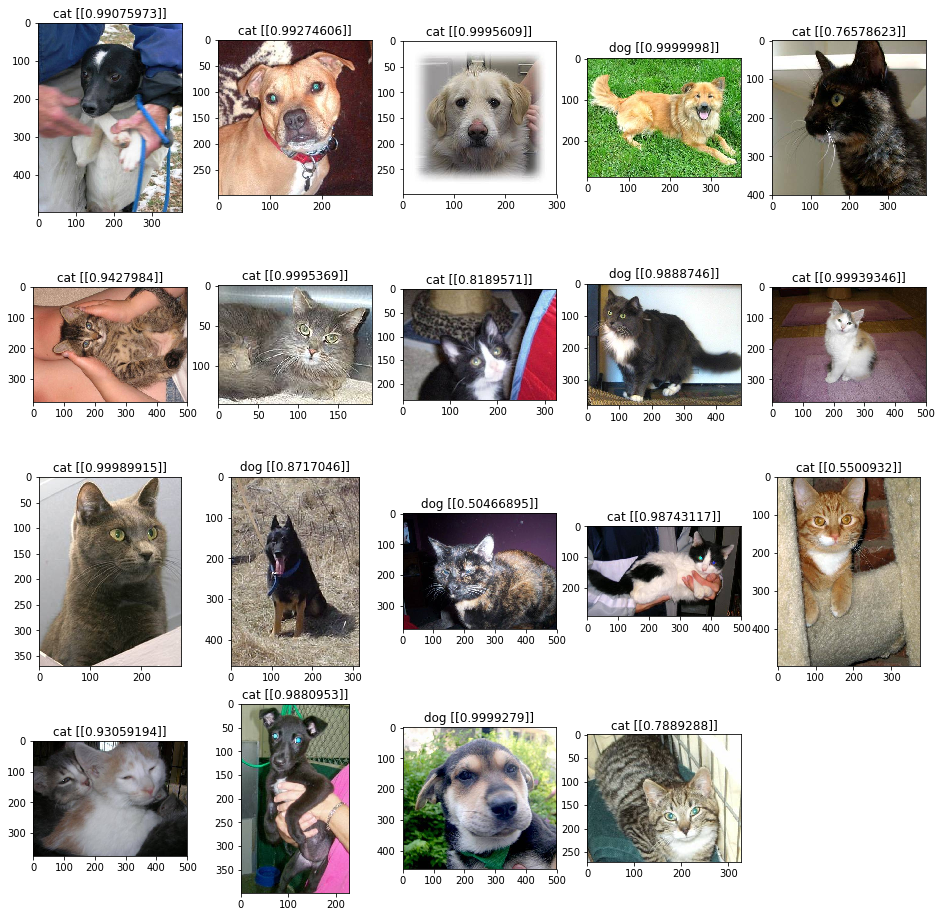

400/400 [==============================] - 0s 374us/step


[1.4830168199539184, 0.6125]

In [11]:
from skimage.transform import resize
fig=plt.figure(figsize=(16, 16))
for i in range(1, 20):
    my_image =  'images/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image))
    ax = fig.add_subplot(4, 5, i)
    plt.imshow(my_image)
    num_px = 64
    my_image = resize(my_image, (num_px, num_px))
    my_image.shape
    my_image = my_image.reshape(1, -1)
    a = cat_model.predict(my_image)
    if  a > 0.5:
        ax.title.set_text('cat {}'.format(a))
    else:
        ax.title.set_text('dog {}'.format(1 - a))
    
plt.show()
cat_model.evaluate(x_test, y_test)